In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv(r'E:\Nextstep\Scaler\Business-Case-Study\Aerofit\Dataset\aerofit_treadmill.csv')
#raw_data = pd.read_csv(r'F:\Muthu_2023\Personal\NextStep\DSCourse\Scaler\Business-Case-Study\Aerofit\Dataset\aerofit_treadmill.csv')

In [3]:
raw_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [11]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Inference:**
- `No null values in all the columns`
- `3 categorical and 5 numerical columns`

In [12]:
raw_data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Inference:**
- `25% of users in the age range of 24 to 26`
- `Education, Usage and fitness seems to be integer and it requires detailed analysis`
- ``

In [13]:
raw_data.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


# Exploratory Data Analysis

In [5]:
plt.rcParams['figure.figsize'] = (12,6)

## UVA on Categorical column

In [34]:
def plot_count(df, col):
    plt.suptitle('Sales Quantity by ' + col)
    plt.subplot(1,2,1)
    sns.countplot(data = df, x = col)
    plt.subplot(1,2,2)
    plt.pie(df[col].value_counts(), labels = list(df[col].value_counts().index), autopct = '%0.1f%%')

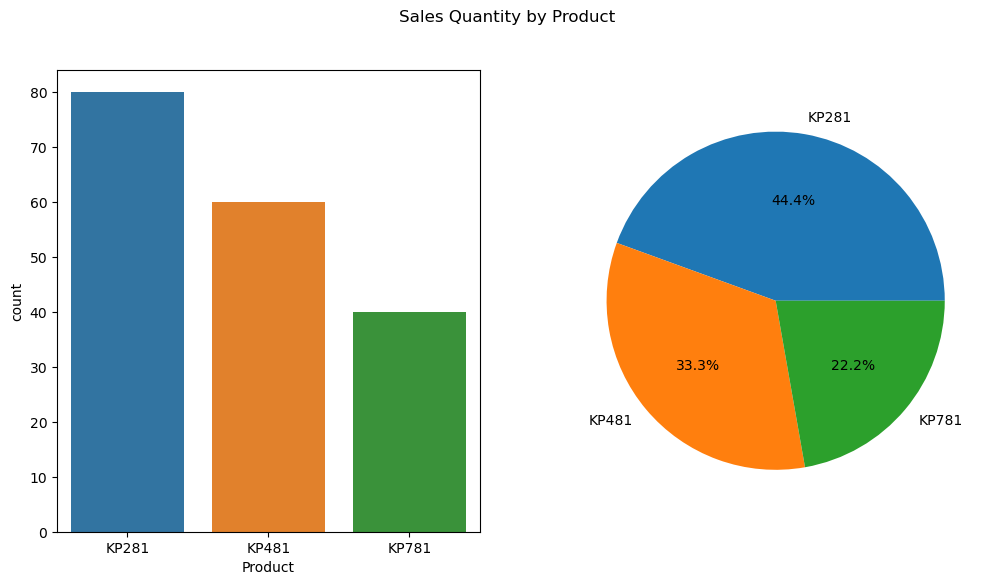

In [35]:
plot_count(raw_data, 'Product')

**Inference:**
- `KP281 has highest market share among other products`

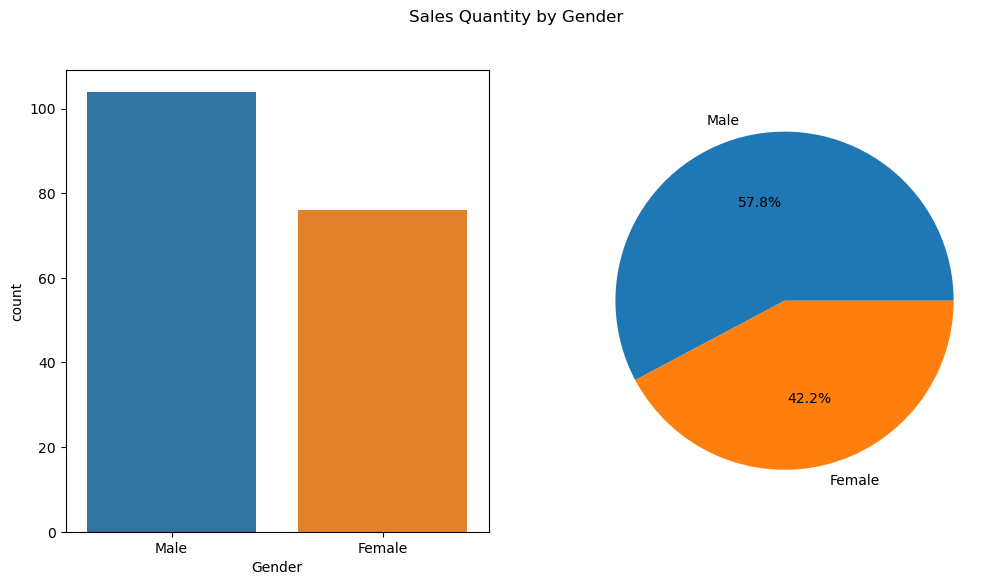

In [36]:
plot_count(raw_data, 'Gender')

**Inference:**
- `Purchase of male customer is the most`

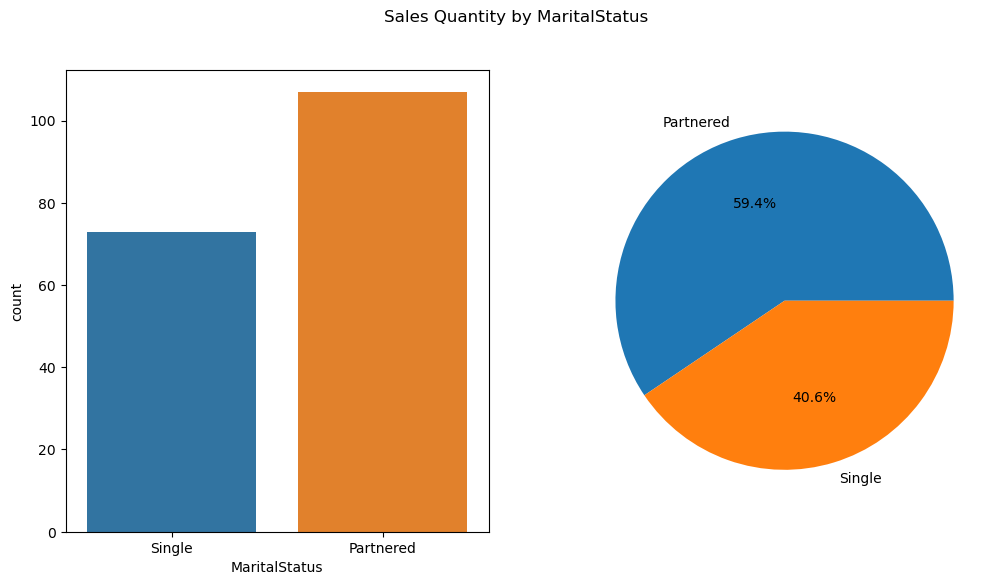

In [37]:
plot_count(raw_data, 'MaritalStatus')

**Inference:**
- `Partnered makes the most purchase than single`

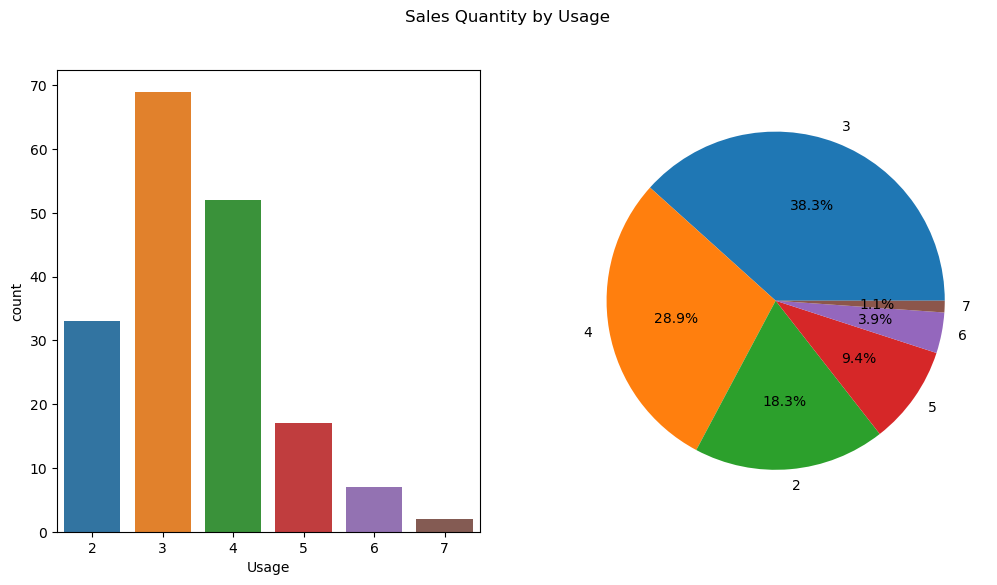

In [38]:
plot_count(raw_data, 'Usage')

**Inferece:**
- `Users purchased the most who uses the treadmill 3-4 days a week`
- `80% of users uses the treadmill 2-4 days a week`

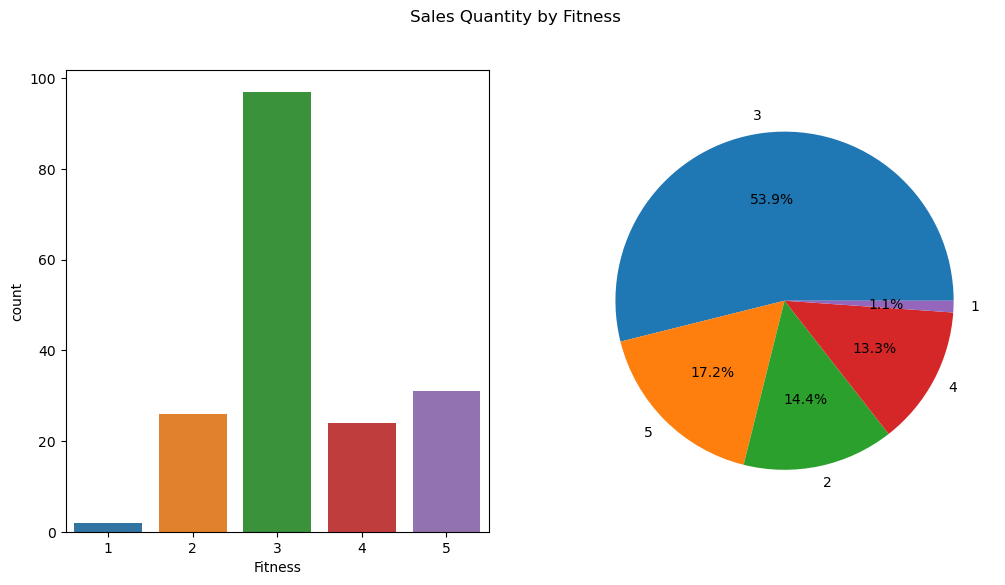

In [39]:
plot_count(raw_data, 'Fitness')

**Inference:**
- `Average rated users are the most in purchasing the treadmill`

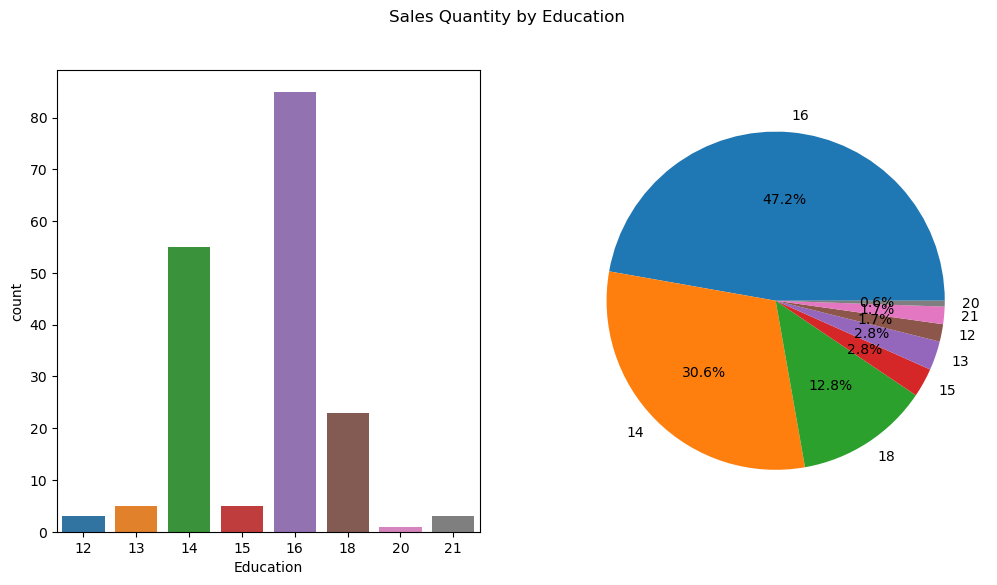

In [40]:
plot_count(raw_data, 'Education')

**Inference:**
- `Users with 14 and 16 years of education purchases the most`
- `Need further investigation on this part how it relates to the purchase of treadmill`

## UVA on Numerical columns

In [48]:
def plot_hist(df, col):
    plt.suptitle('Sales Quantity by ' + col)
    plt.subplot(1,2,1)
    sns.histplot(data = df, x = col)
    plt.subplot(1,2,2)
    sns.boxplot(data = df, y = col)
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


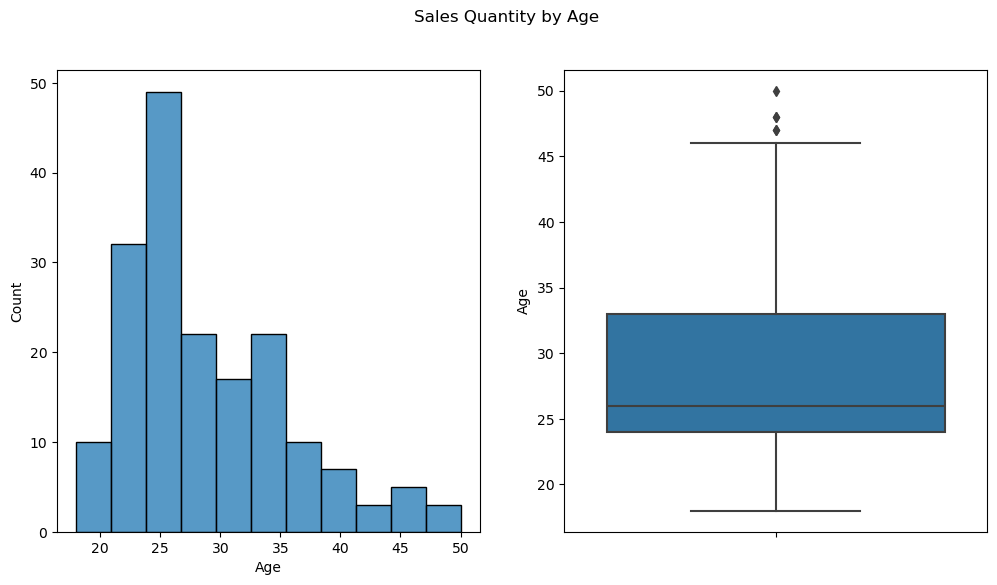

In [49]:
plot_hist(raw_data, 'Age')

**Inference:**
- `Predominant of the purchase is peformed by 20 to 35 age groups`

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


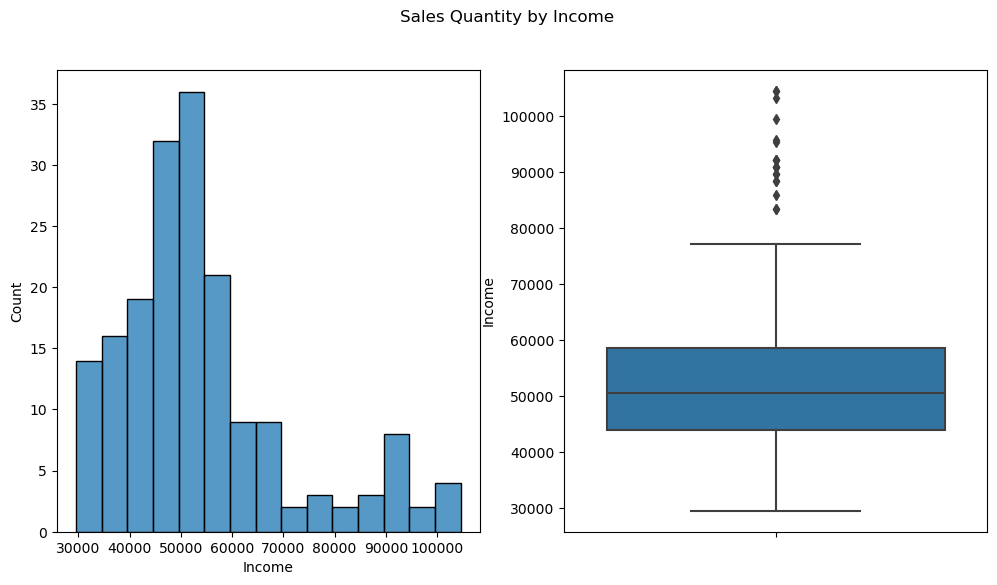

In [50]:
plot_hist(raw_data, 'Income')

**Inference:**
- `75% of the purchases are performed by users with income lesser than 60`

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


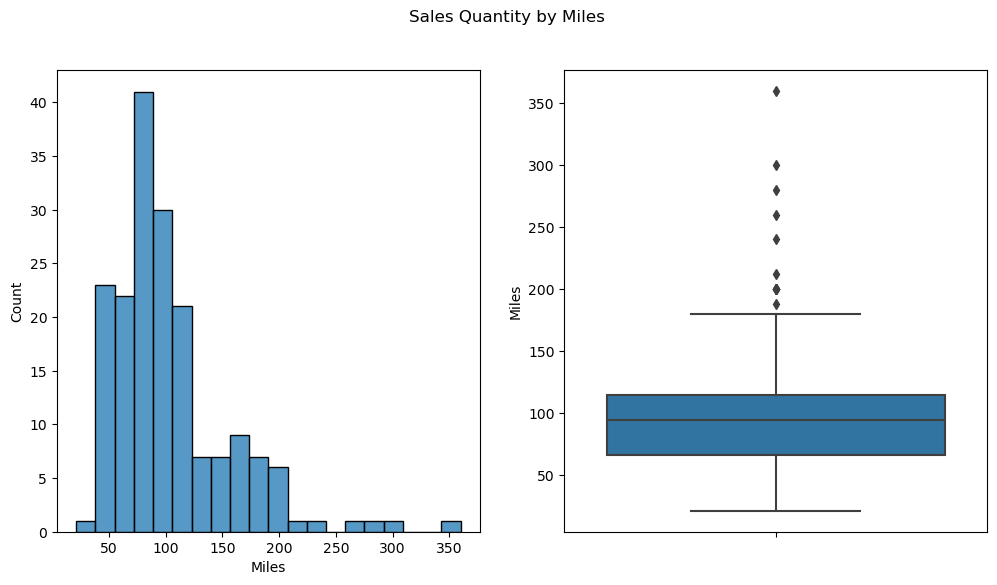

In [51]:
plot_hist(raw_data, 'Miles')

**Inference:**
- `Users who runs 50-100 miles are the most who shown the interest in purchasing the treadmill`

# Bivariate Analysis

<Axes: xlabel='Education', ylabel='count'>

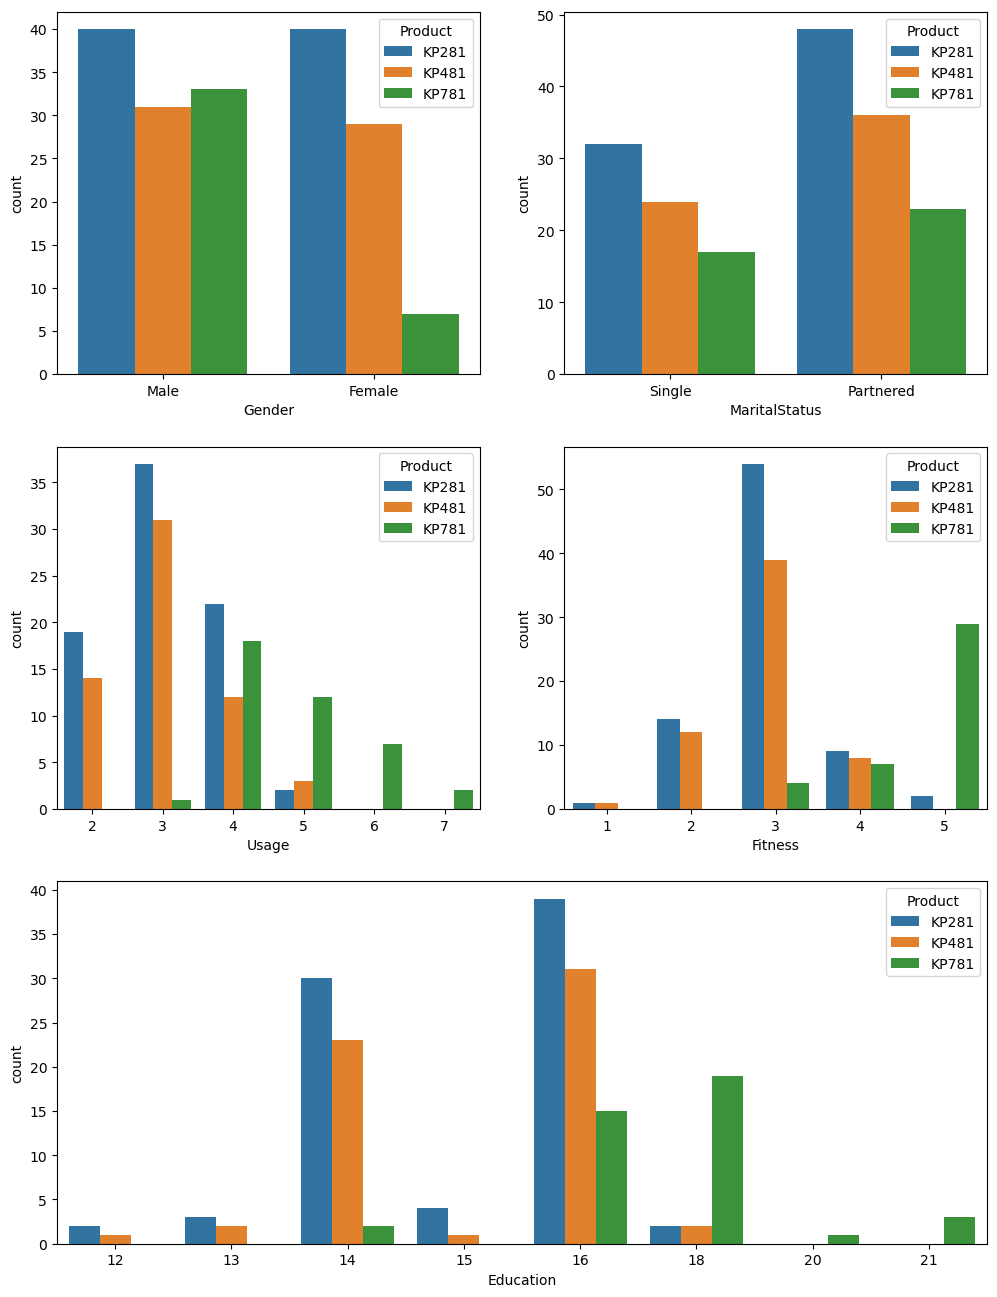

In [14]:
plt.figure(figsize=(12, 16))
plt.subplot(3,2,1)
sns.countplot(data = raw_data, hue = 'Product', x='Gender')
plt.subplot(3,2,2)
sns.countplot(data = raw_data, hue = 'Product', x='MaritalStatus')
plt.subplot(3,2,3)
sns.countplot(data = raw_data, hue = 'Product', x='Usage')
plt.subplot(3,2,4)
sns.countplot(data = raw_data, hue = 'Product', x='Fitness')
plt.subplot(3,1,3)
sns.countplot(data = raw_data, hue = 'Product', x='Education')

**Inference:**
- ***Product vs Gender:*** `Female show very less interest in buying the product KP781`
- ***Product vs Martial Status:*** `Partnered users are highly interested in buying treadmill`
- ***Product vs Usage:*** `Users with high usage are more prone to buy KP781 and less usage prefers other 2 products`
- ***Product vs Fitness:*** `Medium fitness users (2-4) are much interested in buying treadmill predominantly and only High fitness users prefer KP781`
- ***Product vs Education:*** `Higher education group prefers product KP781`

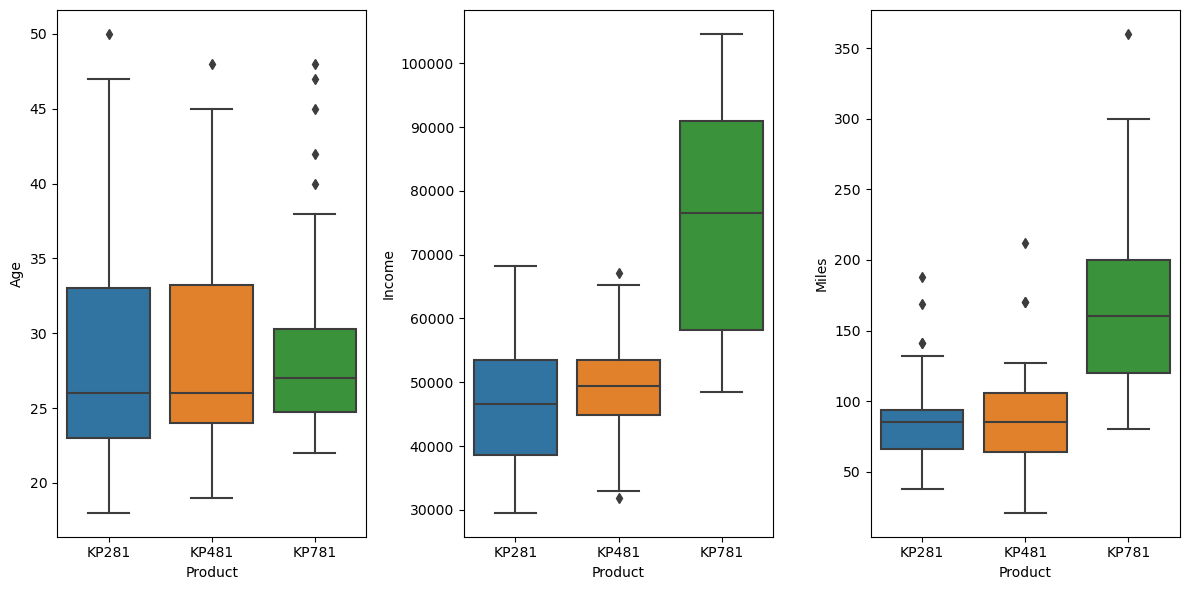

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1,3,1)
sns.boxplot(data = raw_data, x = 'Product', y='Age')
plt.subplot(1,3,2)
sns.boxplot(data = raw_data, x = 'Product', y='Income')
plt.subplot(1,3,3)
sns.boxplot(data = raw_data, x = 'Product', y='Miles')
# plt.subplot(3,2,4)
# sns.countplot(data = raw_data, hue = 'Product', x='Fitness')
# plt.subplot(3,1,3)
# sns.countplot(data = raw_data, hue = 'Product', x='Education')
plt.tight_layout()

**Inference:**
- ***Age vs Product:*** `Predominant of the users of KP781 are in 20s age group`
- ***Income vs Product:*** `Purchase of KP781 is dominated by higher income users. Hence it seems that KP781 is on costlier side.
KP481 is in the medium range and KP 281 is on the lower side`
- ***Miles vs Product:*** `Purchase of KP781 is dominated by higher miles users and it seems that it is preferred by heavy workout users`

# Multivariate Analysis

<Axes: xlabel='Gender', ylabel='Age'>

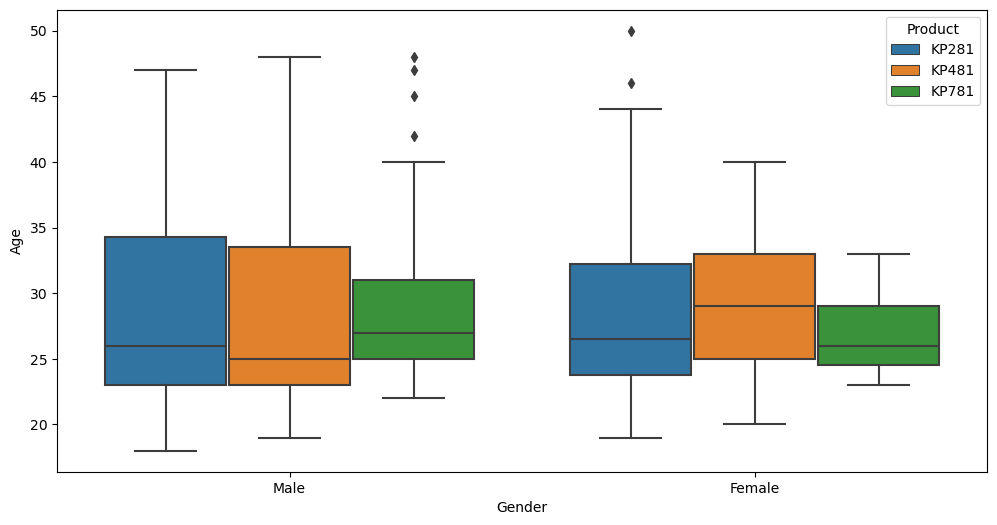

In [27]:
sns.boxplot(data=raw_data, y = 'Age', x = 'Gender', hue='Product')

**Inference:**
- `Median age of male interested in KP481 is lesser than other 2 products whereas it is vice versa for female users`


<Axes: xlabel='Gender', ylabel='Income'>

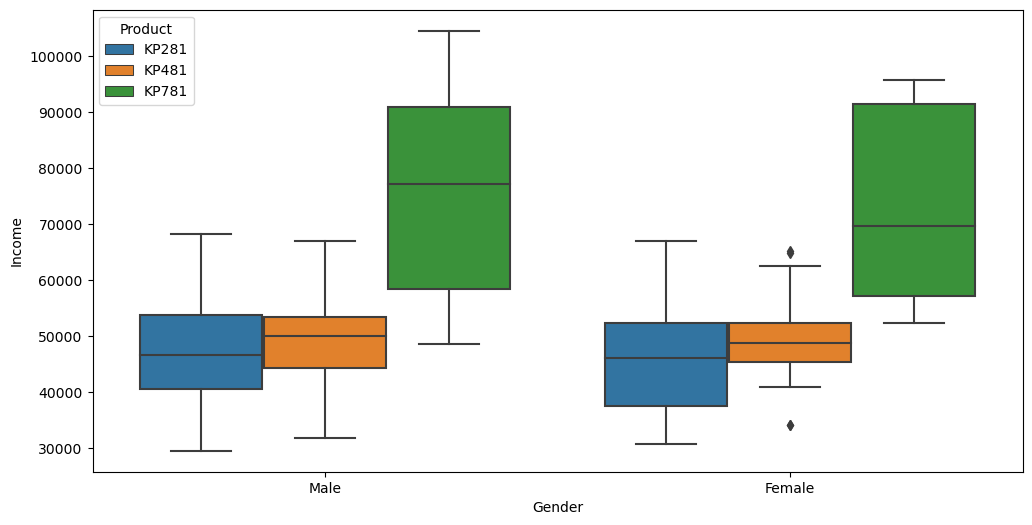

In [28]:
sns.boxplot(data=raw_data, y = 'Income', x = 'Gender', hue='Product')

<Axes: xlabel='Gender', ylabel='Miles'>

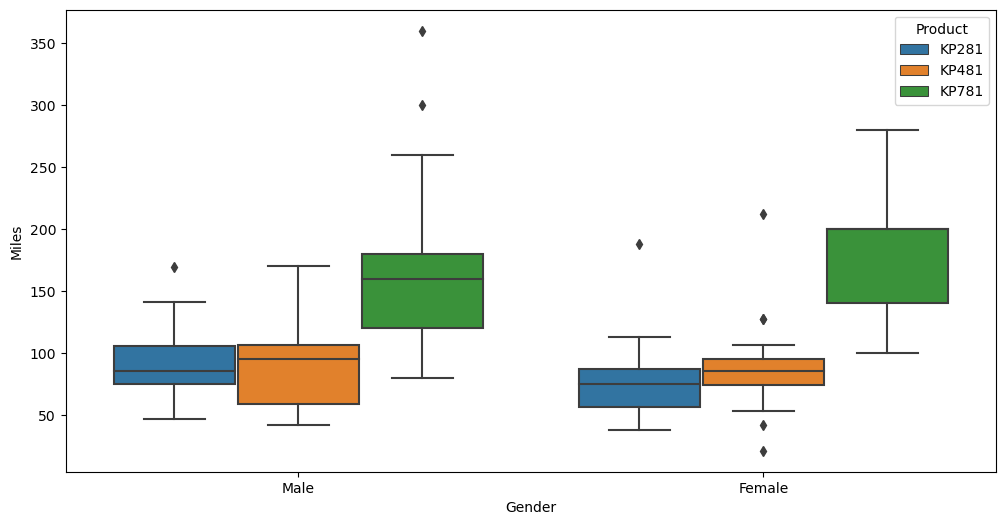

In [29]:
sns.boxplot(data=raw_data, y = 'Miles', x = 'Gender', hue='Product')

<Axes: xlabel='MaritalStatus', ylabel='Age'>

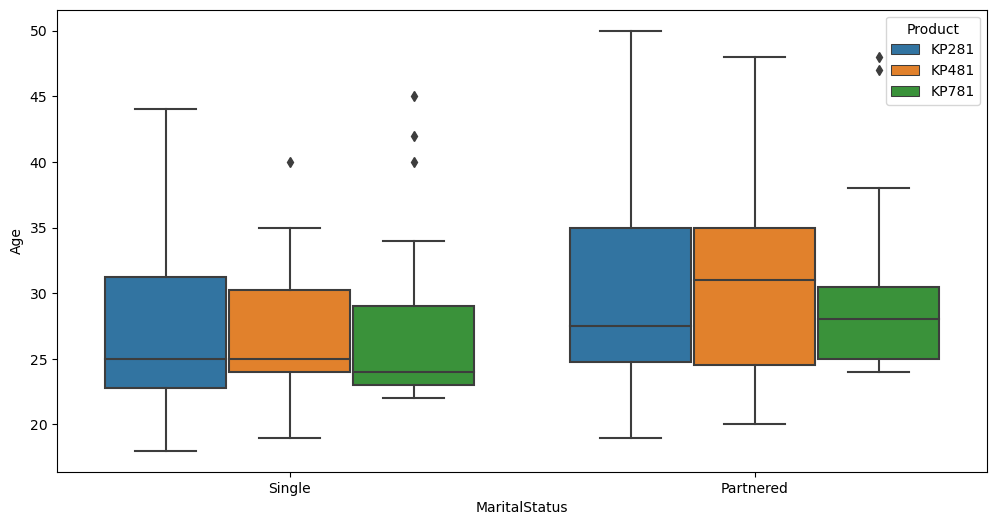

In [30]:
sns.boxplot(data=raw_data, y = 'Age', x = 'MaritalStatus', hue='Product')

<Axes: xlabel='Usage', ylabel='Age'>

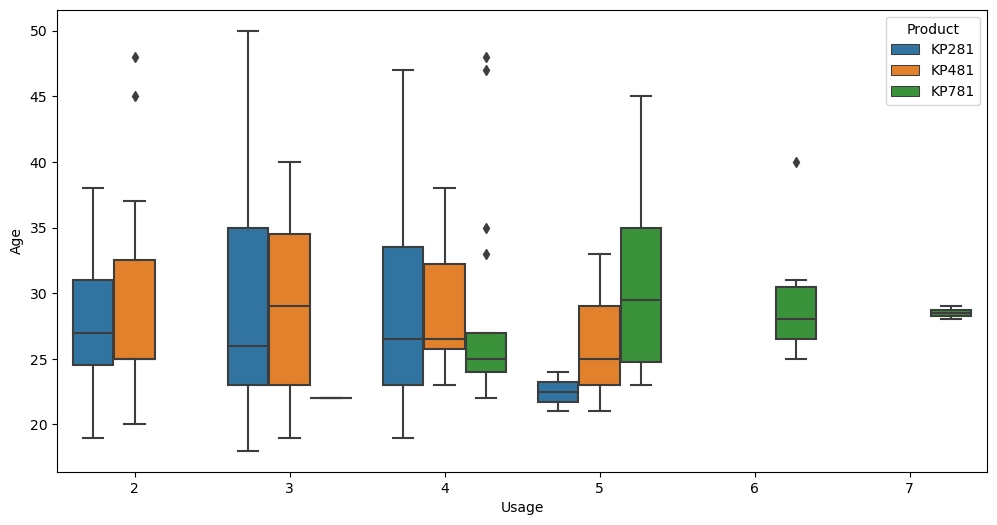

In [31]:
sns.boxplot(data=raw_data, y = 'Age', x = 'Usage', hue='Product')

**Inference:**
- `High usage `

<Axes: xlabel='Product', ylabel='Income'>

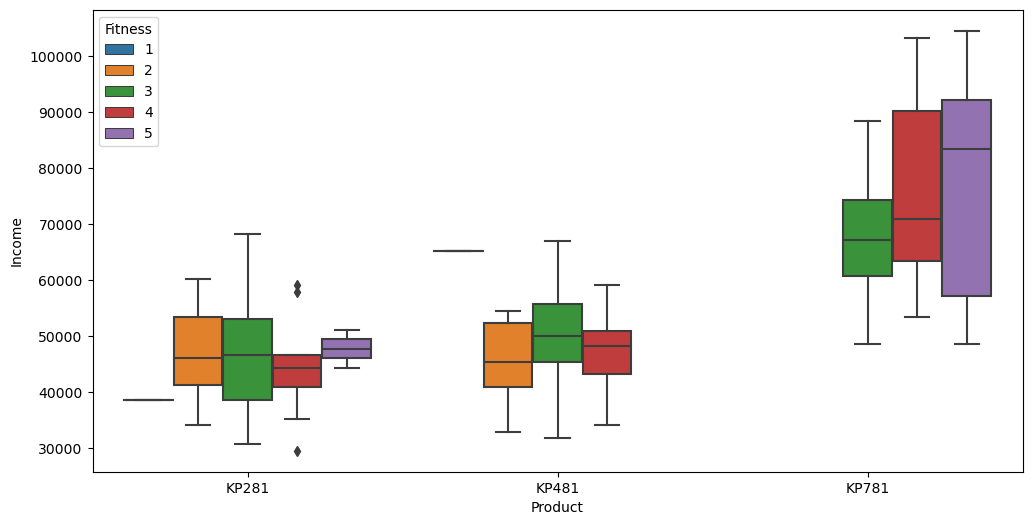

In [34]:
sns.boxplot(data=raw_data, y = 'Income', x = 'Product', hue='Fitness')

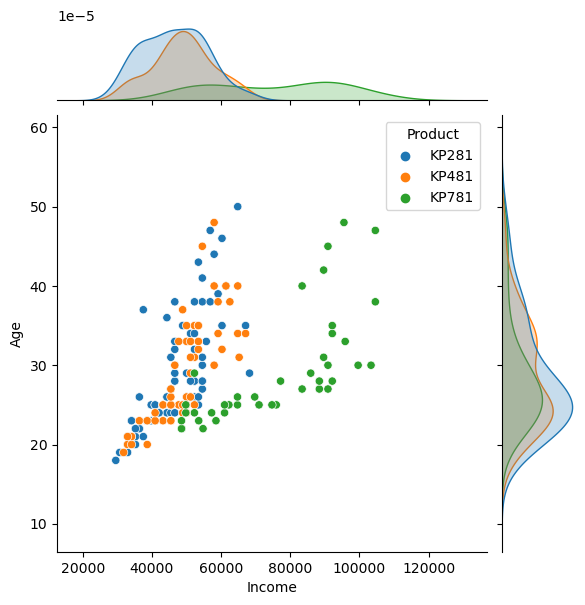

In [51]:
sns.jointplot(data=raw_data, x = 'Income',  y='Age', hue = 'Product')

In [10]:
pd.crosstab(raw_data['Product'], columns = [raw_data['Gender'], raw_data['Fitness'], raw_data['Usage']], margins=True, normalize=True)

Gender     Female                                                              \
Fitness         1         2                   3                                 
Usage           2         2         3         2         3         4         5   
Product                                                                         
KP281    0.000000  0.038889  0.016667  0.033333  0.072222  0.038889  0.000000   
KP481    0.005556  0.005556  0.027778  0.027778  0.038889  0.022222  0.011111   
KP781    0.000000  0.000000  0.000000  0.000000  0.000000  0.005556  0.000000   
All      0.005556  0.044444  0.044444  0.061111  0.111111  0.066667  0.011111   

Gender                                 ...      Male                      \
Fitness         4                      ...         4                       
Usage           3         4         5  ...         3         4         5   
Product                                ...                                 
KP281    0.016667  0.000000  0.000000  ...  0.011111  0.016667  0.005556   
KP481    0.011111  0.005556  0.005556  ...  0.016667  0.005556  0.000000   
KP781    0.000000  0.000000  0.005556  ...  0.000000  0.011111  0.016667   
All      0.027778  0.005556  0.011111  ...  0.027778  0.033333  0.022222   

Gender                                                                    All  
Fitness                   5                                                    
Usage           6         3         4         5         6         7            
Product                                                                        
KP281    0.000000  0.000000  0.005556  0.000000  0.000000  0.000000  0.444444  
KP481    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.333333  
KP781    0.005556  0.005556  0.061111  0.033333  0.022222  0.011111  0.222222  
All      0.005556  0.005556  0.066667  0.033333  0.022222  0.011111  1.000000  

[4 rows x 30 columns]